# 03 - Multi-variable Linear Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [1]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.3.0'

# Hypothesis and Cost

$$ H(x) = Wx + b $$ 

$$ cost(W, b)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (H{ x }^{ i }-y^{ i } })^{ 2 } }  $$

# Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$



b를 W 행렬에 넣어 표현할 수 있기 때문에 생략 가능

# Cost function
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


# Cost function in pure Python

In [2]:
import numpy as np

X = [1, 2, 3]
Y = [1, 2, 3]

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("%6.3f | %10.5f" % (feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


# Cost function in TensorFlow

In [8]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(0)

@tf.function
def hypothesis(X, W):
    return X * W
cost = lambda W: tf.reduce_mean(tf.square(hypothesis(X, W) - Y))

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost(feed_W)
    # curr_cost = sess.run([cost, W], feed_dict={W: feed_W})
    # print("%6.3f | %10.5f" % (feed_W, curr_cost[0]))
    print('{:6.3f} | {:10.5f}'.format(feed_W, curr_cost.numpy()))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


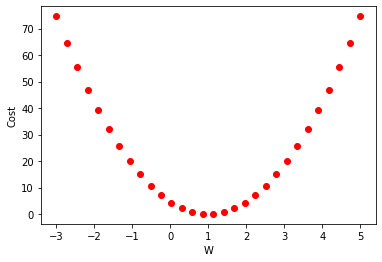

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(0.0)

@tf.function
def hypothesis(X, W):
    return X * W

cost = lambda W: tf.reduce_mean(tf.square(hypothesis(X, W) - Y))

W_val = np.linspace(-3, 5, num=30)
cost_val = []
for feed_W in W_val:
    curr_cost  = cost(feed_W)
    cost_val.append(curr_cost.numpy())

plt.plot(W_val, cost_val, "ro")
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

# How to minimize cost?
* 현재 데이터 X와 Y에 대해 W가 1일 때 cost 가 가장 작다
* cost 가 최소가 되는 W를 어떻게 찾을 수 있을까?

# Gradient descent algorithm
* Minimize cost function
* used many minimization problems
* For a given cost (W, b), it will find W, b to minimize cost
* It can be applied to more general function: cost (w1, w2, ...)

# How does it work?
* Start with initial guesses
 * Start at 0,0 (or any other value)
 * Keeping changing $W$ and $b$ a little bit to try and reduce $cost(W,b)$
* Each time you change the parameters, you select the gradient which reduces $cost(W,b)$ the most possible 
* Repeat
* Do so until you converge to a local minimum
* Has an interesting property
 * Where you start can determine which minimum you end up

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Formal definition
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ \Downarrow $$

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

* m 혹은 2m 나누는 것이 cost 최소화에 영향 없음
* 제곱을 미분할 때, 2가 앞으로 나오면서 공식이 단순하게 되는 효과

# Formal definition
$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ W:=W - \alpha\frac{ \partial } {\partial W } cost(W) $$

* W = W - 변화량
* 변화량 = 현 위치(W)에서 비용곡선의 기울기(=미분값) X $\alpha$ <br> $\alpha$ : learning rate (시도 간격)

# Formal definition

$$ W:=W - \alpha\frac{ \partial } {\partial W } \frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } } $$

$$ W:=W-\alpha \frac { 1 }{ 2m } \sum _{ i=1 }^{ m }{ { 2(W{ x }^{ i }-y^{ i } })x^{ i } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$



# Gradient descent algorithm
$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$

# Convex function
<img width="40%" src="http://i.imgur.com/TSKliup.png" >
<img width="40%" src="http://i.imgur.com/GyCwshy.png" >

Gradient descent algorithm을 사용하려면, 비용함수 cost(W,b)가 Convex function 이어야 한다

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Gradient descent 구현

In [62]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.uniform([1], -1000., 1000.))
print(W)
X = tf.Variable(1.0)
Y = tf.Variable(1.0)
def hypothesis(X):
    return tf.multiply(W,X)

def cost(hypothesis, X, Y):
    return tf.reduce_mean(tf.square(hypothesis(X) - Y))

def descent(W, X, Y):
    mean = tf.reduce_mean(tf.multiply(tf.subtract(tf.multiply(W, X), Y), X))
    descent = tf.subtract(W, tf.multiply(tf.constant(0.01), mean))
    return descent

update = W.assign(descent(W, X, Y))
print(W)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([26.489502], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([26.234608], dtype=float32)>


In [64]:
for step in range(2000):
    W.assign(descent(W, x_data, y_data))
    cResult = cost(hypothesis, x_data, y_data)
    wResult = W
    if step % 100 == 0:
        print('%5d | %.15f | %.15f' %(step, cResult, wResult))

    0 | 3873.476562500000000 | 24.392011642456055
  100 | 0.167321950197220 | 1.676013946533203
  200 | 0.166666656732559 | 1.666670441627502
  300 | 0.166666656732559 | 1.666667461395264
  400 | 0.166666656732559 | 1.666667461395264
  500 | 0.166666656732559 | 1.666667461395264
  600 | 0.166666656732559 | 1.666667461395264
  700 | 0.166666656732559 | 1.666667461395264
  800 | 0.166666656732559 | 1.666667461395264
  900 | 0.166666656732559 | 1.666667461395264
 1000 | 0.166666656732559 | 1.666667461395264
 1100 | 0.166666656732559 | 1.666667461395264
 1200 | 0.166666656732559 | 1.666667461395264
 1300 | 0.166666656732559 | 1.666667461395264
 1400 | 0.166666656732559 | 1.666667461395264
 1500 | 0.166666656732559 | 1.666667461395264
 1600 | 0.166666656732559 | 1.666667461395264
 1700 | 0.166666656732559 | 1.666667461395264
 1800 | 0.166666656732559 | 1.666667461395264
 1900 | 0.166666656732559 | 1.666667461395264


In [65]:
print('-' * 50)
print(hypothesis(X = 5))
print(hypothesis(X=2.5))

--------------------------------------------------
tf.Tensor([8.333338], shape=(1,), dtype=float32)
tf.Tensor([4.166669], shape=(1,), dtype=float32)


## Another way using gradient tape

In [37]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.uniform([1], -1000., 1000.))
X = tf.Variable(0.0)
Y = tf.Variable(0.0)

learning_rate = tf.constant(0.01)

for i in range(10000):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data
        cost = tf.reduce_mean(tf.square(tf.subtract(hypothesis,  y_data)))
    (W_grad) = tape.gradient(cost, [W])
    W.assign_sub(learning_rate * W_grad[0])
    if i % 1000 == 0 :
        print(f'{i} | {W.numpy()} | {cost.numpy()}')

0 | [-45.64668] | 23237.73828125
1000 | [1.6666663] | 0.1666666716337204
2000 | [1.6666663] | 0.1666666716337204
3000 | [1.6666663] | 0.1666666716337204
4000 | [1.6666663] | 0.1666666716337204
5000 | [1.6666663] | 0.1666666716337204
6000 | [1.6666663] | 0.1666666716337204
7000 | [1.6666663] | 0.1666666716337204
8000 | [1.6666663] | 0.1666666716337204
9000 | [1.6666663] | 0.1666666716337204


## X, Y can not be expressed as `ax = y` , it needs to be `ax + b = y`

# Liner regression Summary

## 1) Hypothesis 

$$ H(x) = Wx + b $$

## 2) Cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

## 3) Gradient descent

$$ W := W-\alpha \frac { \partial  }{ \partial W } cost(W) $$

# Multi-variable linear regression
Predicting exam score - regression using three inputs (x1, x2, x3)

x1 (quiz 1) | x2 (quiz 2) | x3 (mid 1) | Y (final)
---- | ---- | ----| ----
73 | 80 | 75 | 152
93 | 88 | 93 | 185
89 | 91 | 90 | 180
96 | 98 | 100 | 196
73 | 66 | 70 | 142


Test Scores for General Psychology ( https://goo.gl/g2T8Kp )

# Matrix multiplication

## dot product(=scalar product, 내적)
<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg" >


https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Multi-feature regression

### Hypothesis

$$ H(x) = w x + b $$

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

# Hypothesis using matrix

$$ H(x_1, x_2, x_3) = \underline{w_1 x_1 + w_2 x_2 + w_3 x_3} + b $$

$$ w_1 x_1 + w_2 x_2 + w_3 x_3 $$ 

$$ \begin{pmatrix} w_{ 1 } & w_{ 2 } & w_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \end{pmatrix} $$

$$ WX $$ (W, X 는 matrix)

# Hypothesis without b

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

$$ = b + w_1 x_1 + w_2 x_2 + w_3 x_3 $$

$$ = \begin{pmatrix} b & x_{ 1 } & x_{ 2 } & x_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} 1 \\ w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix} $$

$$ = XW $$



# Hypothesis using matrix 

### Many x instances

$$ \begin{pmatrix} x_{ 11 } & x_{ 12 } & x_{ 13 } \\ x_{ 21 } & x_{ 22 } & x_{ 23 } \\ x_{ 31 } & x_{ 32 } & x_{ 33 }\\ x_{ 41 } & x_{ 42 } & x_{ 43 }\\ x_{ 51 } & x_{ 52 } & x_{ 53 }\end{pmatrix} \cdot \begin{pmatrix} w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix}=\begin{pmatrix} x_{ 11 }w_{ 1 }+x_{ 12 }w_{ 2 }+x_{ 13 }w_{ 3 } \\ x_{ 21 }w_{ 1 }+x_{ 22 }w_{ 2 }+x_{ 23 }w_{ 3 }\\ x_{ 31 }w_{ 1 }+x_{ 32 }w_{ 2 }+x_{ 33 }w_{ 3 } \\ x_{ 41 }w_{ 1 }+x_{ 42 }w_{ 2 }+x_{ 43 }w_{ 3 } \\ x_{ 51 }w_{ 1 }+x_{ 52 }w_{ 2 }+x_{ 53 }w_{ 3 } \end{pmatrix} $$

$$ [5, 3] \cdot [3, 1] = [5, 1] $$

$$ H(X) = XW $$

5는 데이터(instance)의 수, 3은 변수(feature)의 수, 1은 결과

# Hypothesis using matrix (n output)

$$ [n, 3] \cdot [?, ?] = [n, 2] $$

$$ H(X) = XW $$

* n은 데이터(instance)의 개수, 2는 결과 값의 개수로 주어진다.
* 이때, W [?, ?] ⇒ [3, 2]

# WX vs XW

### Theory (Lecture) :
 $$ H(x) = Wx + b  $$

### TensorFlow (Implementation) :

$$ H(X) = XW $$

# Simple Example (2 variables)

x1 | x2 | y
---- | ---- | ----
1  |  0  |  1
0  |  2  |  2
3  |  0  |  3
0  |  4  |  4
5  |  0  |  5

In [73]:
import tensorflow as tf

x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
W2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b  = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# hypothesis = W * X + b
@tf.function
def hypothesis(W1, W2, x1_data, x2_data, b):
    return W1 * x1_data + W2 * x2_data + b
cost = lambda : tf.reduce_mean(tf.square(tf.subtract(hypothesis(W1, W2, x1_data, x2_data, b),y_data)))

In [76]:
rate = tf.Variable(0.1)
optimizer = tf.keras.optimizers.SGD(rate)

for step in range(1,2001):
    optimizer.minimize(cost, var_list = [W1, W2, b])
    if step % 100 == 0:
        print("%-5d | %.15f | %f | %f | %f" % (step, cost().numpy(), W1.numpy(), W2.numpy(),b.numpy()))

100   | 0.000000000780892 | 0.999983 | 0.999979 | 0.000066
200   | 0.000000000001776 | 0.999999 | 0.999999 | 0.000003
300   | 0.000000000000023 | 1.000000 | 1.000000 | 0.000000
400   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
500   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
600   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
700   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
800   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
900   | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1000  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1100  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1200  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1300  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1400  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1500  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1600  | 0.000000000000014 | 1.000000 | 1.000000 | 0.000000
1700  | 0.000000000000014 | 1.000000 | 1.000000 | 0.0000

# Simple Example (2 variables)

In [79]:
import tensorflow as tf

x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform([1, 2], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

@tf.function
def hypothesis(W, b, x_data):
    return tf.matmul(W, x_data) + b     # [1, 2] * [2, 5] = [1, 5]

cost = lambda: tf.reduce_mean(tf.square(tf.subtract(hypothesis(W, b, x_data), y_data)))

rate = tf.Variable(0.1)
optimizer = tf.keras.optimizers.SGD(rate)
for step in range(1,2001):
    optimizer.minimize(cost, var_list=[W, b])
    if step % 100 == 0:
        print("%-5d | %.15f | %s | %f " % (step, cost().numpy(), W.numpy(), b.numpy()))


100   | 0.000002354861635 | [[0.99904376 0.99886537]] | 0.003638 
200   | 0.000000004782930 | [[0.99995685 0.99994886]] | 0.000164 
300   | 0.000000000009663 | [[0.9999981 0.9999977]] | 0.000007 
400   | 0.000000000000023 | [[0.9999999 0.9999999]] | 0.000000 
500   | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
600   | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
700   | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
800   | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
900   | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1000  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1100  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1200  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1300  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1400  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1500  | 0.000000000000014 | [[1.         0.99999994]] | 0.000000 
1600  | 0.0000

# Hypothesis without b

In [81]:
import tensorflow as tf

# 앞의 코드에서 bias(b)를 행렬에 추가
# 갯수가 같아야 하므로 b를 리스트로 처리

x_data = [
    [1., 1., 1., 1., 1.], 
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform([1, 3], -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

hypothesis = lambda: tf.matmul(W, x_data) # b가 없다

cost = lambda: tf.reduce_mean(tf.square(tf.subtract(hypothesis(), y_data)))

rate = tf.Variable(0.1)
optimizer = tf.keras.optimizers.SGD(rate)

for step in range(1,1001):
    optimizer.minimize(cost, var_list = [W])
    if step % 50 == 0:
        # without b
        print("%-5d | %.15f | %s | %f " % (step, cost().numpy(), W.numpy(), b.numpy()))

50    | 0.002462390344590 | [[0.11763684 0.96907663 0.9633096 ]] | 0.000000 
100   | 0.000111080029455 | [[0.0249852  0.99343216 0.9922072 ]] | 0.000000 
150   | 0.000005010932000 | [[0.00530662 0.998605   0.9983449 ]] | 0.000000 
200   | 0.000000225986781 | [[0.0011271  0.99970376 0.99964845]] | 0.000000 
250   | 0.000000010182873 | [[2.3936984e-04 9.9993712e-01 9.9992532e-01]] | 0.000000 
300   | 0.000000000460855 | [[5.0766437e-05 9.9998659e-01 9.9998415e-01]] | 0.000000 
350   | 0.000000000020455 | [[1.0793168e-05 9.9999720e-01 9.9999660e-01]] | 0.000000 
400   | 0.000000000001012 | [[2.2768579e-06 9.9999934e-01 9.9999928e-01]] | 0.000000 
450   | 0.000000000000094 | [[5.745497e-07 9.999998e-01 9.999998e-01]] | 0.000000 
500   | 0.000000000000048 | [[1.8831179e-07 9.9999994e-01 9.9999994e-01]] | 0.000000 
550   | 0.000000000000048 | [[1.6446995e-07 9.9999994e-01 9.9999994e-01]] | 0.000000 
600   | 0.000000000000048 | [[1.6446995e-07 9.9999994e-01 9.9999994e-01]] | 0.000000 
650   |

# Multi-variable linear regression

version didn't changed

In [9]:
# Multi-variable linear regression
import numpy as np
import tensorflow as tf

tf.set_random_seed(0)  # for reproducibility

data = np.array([
    [73,80,75,152],
    [93,88,93,185],
    [89,91,90,180],
    [96,98,100,196],
    [73,66,70,142]
])

x1_data = data[:,0]
x2_data = data[:,1]
x3_data = data[:,2]
y_data = data[:,3]

# placeholders for a tensor that will be always fed
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)
w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.initializers.global_variables())

for step in range(4001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                          feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 100 == 0:
        print('%4d: Cose=%8.4f' % (step, cost_val), "Prediction: ", hy_val)

   0: Cose=2667.6282 Prediction:  [105.34478  129.50781  125.94277  139.99611   97.017456]
 100: Cose=  3.8105 Prediction:  [151.11192 184.57016 180.1694  199.04204 139.03413]
 200: Cose=  3.7618 Prediction:  [151.08475 184.58958 180.16211 199.02852 139.06659]
 300: Cose=  3.7151 Prediction:  [151.05843 184.60847 180.15512 199.01526 139.09831]
 400: Cose=  3.6701 Prediction:  [151.03287 184.62682 180.14833 199.00217 139.12927]
 500: Cose=  3.6269 Prediction:  [151.0081  184.64462 180.1418  198.98927 139.15953]
 600: Cose=  3.5852 Prediction:  [150.9841  184.66193 180.1355  198.97658 139.1891 ]
 700: Cose=  3.5450 Prediction:  [150.96082 184.6787  180.1294  198.96404 139.21799]
 800: Cose=  3.5063 Prediction:  [150.93826 184.695   180.12355 198.9517  139.24623]
 900: Cose=  3.4689 Prediction:  [150.91638 184.7108  180.11787 198.9395  139.27379]
1000: Cose=  3.4329 Prediction:  [150.89517 184.72614 180.1124  198.92747 139.30074]
1100: Cose=  3.3981 Prediction:  [150.87462 184.74104 180.1